Data loaded. Shape: (3470, 12)
Columns: ['Code', 'UIC', 'Bahnhof', 'Kanton', 'ISB_GI', 'Jahr', 'DTV', 'DWV', 'DNWV', 'EVU', 'lon', 'lat']

--- First 5 rows ---
  Code      UIC            Bahnhof Kanton ISB_GI  Jahr   DTV   DWV  DNWV  EVU  \
0  AAT  8503124             Aathal     ZH    SBB  2018   740   800   610  SBB   
1   AB  8507472         Ausserberg     VS    BLS  2018   180   160   210  BLS   
2  ABE  8504404            Aarberg     BE    SBB  2022   520   580   400  BLS   
3  ABE  8504404            Aarberg     BE    SBB  2023   580   620   460  BLS   
4  ABO  8502000  Aarburg-Oftringen     AG    SBB  2022  2500  2900  1500  SBB   

        lon        lat  
0  8.765625  47.335959  
1  7.844167  46.312348  
2  7.278693  47.044541  
3  7.278693  47.044541  
4  7.908223  47.320268  

--- Missing Values per Column ---
Code       0
UIC        0
Bahnhof    0
Kanton     0
ISB_GI     0
Jahr       0
DTV        0
DWV        0
DNWV       0
EVU        0
lon        0
lat        0
dtype: int64

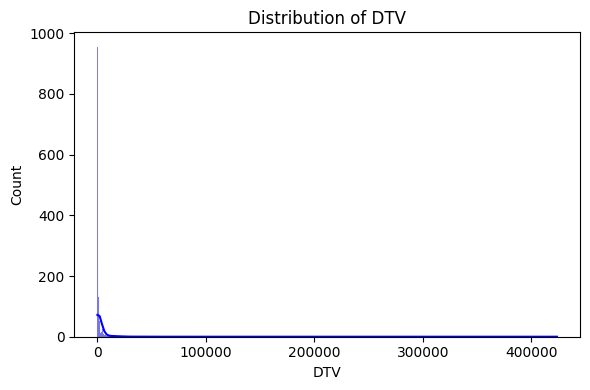

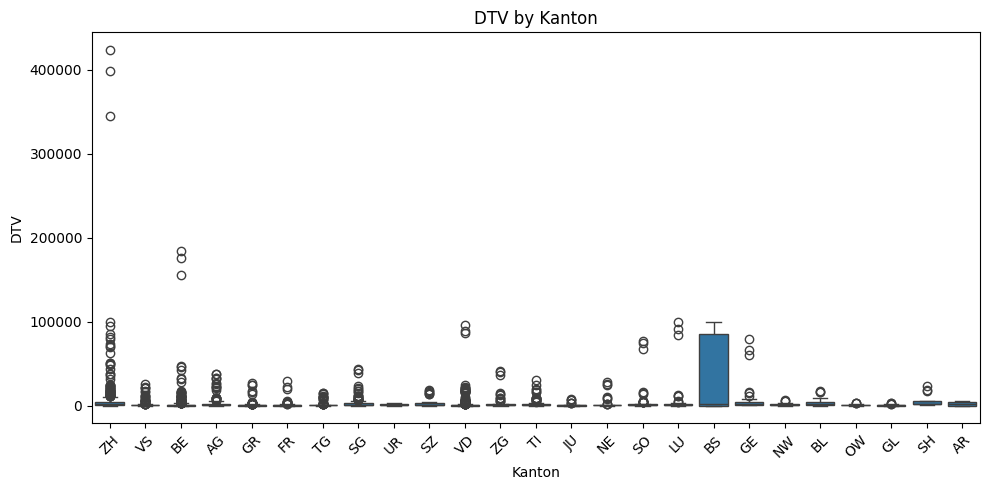


--- Chi-squared Test: Kanton vs EVU ---
Chi2 Stat = 20790.0265744777
p-value   = 0.0
Degrees of Freedom = 1320
Expected frequencies =
 [[1.66858790e-01 2.38051873e+01 2.22478386e-01 ... 5.56195965e-01
  1.51285303e+01 5.67319885e+00]
 [5.18731988e-03 7.40057637e-01 6.91642651e-03 ... 1.72910663e-02
  4.70317003e-01 1.76368876e-01]
 [5.13544669e-01 7.32657061e+01 6.84726225e-01 ... 1.71181556e+00
  4.65613833e+01 1.74605187e+01]
 ...
 [1.51296830e-01 2.15850144e+01 2.01729107e-01 ... 5.04322767e-01
  1.37175793e+01 5.14409222e+00]
 [4.92795389e-02 7.03054755e+00 6.57060519e-02 ... 1.64265130e-01
  4.46801153e+00 1.67550432e+00]
 [3.44956772e-01 4.92138329e+01 4.59942363e-01 ... 1.14985591e+00
  3.12760807e+01 1.17285303e+01]]
Conclusion: p-value < 0.05, association between Kanton and EVU is likely significant.

--- ANOVA: DTV by Kanton ---
Levene’s Test for equal variances:
Statistic = 4.642075492465393
p-value   = 5.650017669477684e-13
=> Variances may not be equal across Kantons. (AN

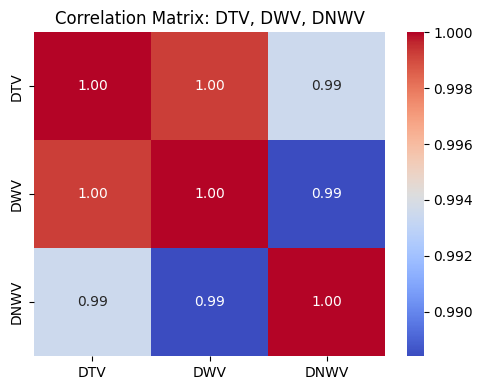


--- Normality Checks by Kanton (Shapiro-Wilk) ---
Kanton=ZH, n=399, Shapiro-Wilk p-value=0.0000
Kanton=VS, n=175, Shapiro-Wilk p-value=0.0000
Kanton=BE, n=594, Shapiro-Wilk p-value=0.0000
Kanton=AG, n=193, Shapiro-Wilk p-value=0.0000
Kanton=GR, n=333, Shapiro-Wilk p-value=0.0000
Kanton=FR, n=96, Shapiro-Wilk p-value=0.0000
Kanton=TG, n=198, Shapiro-Wilk p-value=0.0000
Kanton=SG, n=184, Shapiro-Wilk p-value=0.0000
Kanton=UR, n=30, Shapiro-Wilk p-value=0.0003
Kanton=SZ, n=84, Shapiro-Wilk p-value=0.0000
Kanton=VD, n=411, Shapiro-Wilk p-value=0.0000
Kanton=ZG, n=57, Shapiro-Wilk p-value=0.0000
Kanton=TI, n=102, Shapiro-Wilk p-value=0.0000
Kanton=JU, n=40, Shapiro-Wilk p-value=0.0000
Kanton=NE, n=80, Shapiro-Wilk p-value=0.0000
Kanton=SO, n=93, Shapiro-Wilk p-value=0.0000
Kanton=LU, n=153, Shapiro-Wilk p-value=0.0000
Kanton=BS, n=9, Shapiro-Wilk p-value=0.0004
Kanton=GE, n=56, Shapiro-Wilk p-value=0.0000
Kanton=NW, n=21, Shapiro-Wilk p-value=0.0002
Kanton=BL, n=63, Shapiro-Wilk p-value=0.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway, pearsonr, levene, shapiro

# Display plots inline if you're using a Jupyter Notebook
# (Uncomment the following line if you're in Jupyter)
# %matplotlib inline

#################################
# 1) Load and Inspect the Data
#################################
df = pd.read_csv('data_prepared.csv')

print("Data loaded. Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Optional: Peek at the first few rows
print("\n--- First 5 rows ---")
print(df.head())

#################################
# 2) Basic Data Cleaning
#################################
# Check for missing values
print("\n--- Missing Values per Column ---")
print(df.isna().sum())

# Example: If you want to drop rows missing critical columns:
required_columns = ['Kanton', 'EVU', 'DTV', 'DWV', 'DNWV']
df.dropna(subset=required_columns, inplace=True)
print("\nAfter dropping rows with missing required columns, new shape:", df.shape)

# Convert numeric columns if they're not already
for col in ['DTV', 'DWV', 'DNWV']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=['DTV', 'DWV', 'DNWV'], inplace=True)  # drop rows that didn't convert
print("Final shape:", df.shape)

#################################
# 3) Descriptive Statistics
#################################
print("\n--- Descriptive Statistics (Numeric Columns) ---")
print(df[['DTV', 'DWV', 'DNWV']].describe())

# Count stations by Kanton
print("\n--- Count of Stations per Kanton ---")
print(df['Kanton'].value_counts())

# Count stations by EVU
print("\n--- Count of Stations per EVU ---")
print(df['EVU'].value_counts())

#################################
# 4) Visualizations
#################################

# Histogram of DTV
plt.figure(figsize=(6,4))
sns.histplot(df['DTV'], kde=True, color='blue')
plt.title("Distribution of DTV")
plt.xlabel("DTV")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Boxplot of DTV by Kanton (if many Kantons, might be large)
plt.figure(figsize=(10,5))
sns.boxplot(x='Kanton', y='DTV', data=df)
plt.title("DTV by Kanton")
plt.xlabel("Kanton")
plt.ylabel("DTV")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#################################
# 5) Chi-Squared Test (Kanton vs. EVU)
#################################

print("\n--- Chi-squared Test: Kanton vs EVU ---")
contingency_table = pd.crosstab(df['Kanton'], df['EVU'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi2 Stat =", chi2_stat)
print("p-value   =", p_value)
print("Degrees of Freedom =", dof)
print("Expected frequencies =\n", expected)

if p_value < 0.05:
    print("Conclusion: p-value < 0.05, association between Kanton and EVU is likely significant.")
else:
    print("Conclusion: p-value >= 0.05, no significant evidence of association.")

#################################
# 6) ANOVA: DTV across Kantons
#################################
# Before ANOVA, it can be good practice to test homogeneity of variances
# For example, using Levene’s test across the groups

print("\n--- ANOVA: DTV by Kanton ---")
grouped = df.groupby('Kanton')['DTV']
groups_list = [grouped.get_group(k) for k in grouped.groups]

# Levene’s test for homogeneity of variances
levene_stat, levene_p = levene(*groups_list)
print("Levene’s Test for equal variances:")
print("Statistic =", levene_stat)
print("p-value   =", levene_p)
if levene_p < 0.05:
    print("=> Variances may not be equal across Kantons. (ANOVA assumption violated)\n")
else:
    print("=> Variances appear equal. (ANOVA assumption holds)\n")

# Now the actual ANOVA
f_stat, p_val = f_oneway(*groups_list)
print("ANOVA F-statistic =", f_stat)
print("ANOVA p-value     =", p_val)

if p_val < 0.05:
    print("Conclusion: There's a significant difference in mean DTV among Kantons.")
else:
    print("Conclusion: No significant difference in mean DTV among Kantons.")

# If significant, you might consider post-hoc tests (e.g., Tukey’s HSD) for pairwise comparisons

#################################
# 7) Correlation Analyses
#################################
print("\n--- Correlation Analyses ---")

# 7.1 Pearson Correlation: DTV vs DWV
corr_coeff, corr_pval = pearsonr(df['DTV'], df['DWV'])
print("\nDTV vs DWV")
print("Pearson Correlation =", corr_coeff)
print("p-value             =", corr_pval)

# 7.2 Pearson Correlation: DTV vs DNWV
corr_coeff_dnwv, corr_pval_dnwv = pearsonr(df['DTV'], df['DNWV'])
print("\nDTV vs DNWV")
print("Pearson Correlation =", corr_coeff_dnwv)
print("p-value             =", corr_pval_dnwv)

# 7.3 Pearson Correlation: DWV vs DNWV
corr_coeff_wv_nwv, corr_pval_wv_nwv = pearsonr(df['DWV'], df['DNWV'])
print("\nDWV vs DNWV")
print("Pearson Correlation =", corr_coeff_wv_nwv)
print("p-value             =", corr_pval_wv_nwv)

# 7.4 Correlation Matrix & Heatmap
num_cols = ['DTV', 'DWV', 'DNWV']
corr_matrix = df[num_cols].corr(method='pearson')

print("\n--- Correlation Matrix (Pearson) ---")
print(corr_matrix)

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: DTV, DWV, DNWV")
plt.tight_layout()
plt.show()

#################################
# 8) Additional Tests or Visual Checks
#################################
# Example: Check normality with Shapiro-Wilk for each group in ANOVA
print("\n--- Normality Checks by Kanton (Shapiro-Wilk) ---")
for k in df['Kanton'].unique():
    vals = df.loc[df['Kanton'] == k, 'DTV']
    if len(vals) > 3:  # Shapiro requires n>=3
        w_stat, shapiro_p = shapiro(vals)
        print(f"Kanton={k}, n={len(vals)}, Shapiro-Wilk p-value={shapiro_p:.4f}")
    else:
        print(f"Kanton={k}, n={len(vals)}, (too few samples for Shapiro)")

print("\nAnalysis Complete!")
